### Oscillation analysis with fixed backgrounds

This notebook performs and plots the results of our oscillation analysis for MicroBooNE.
We work with appearance only, and fix the oscillation backgrounds.

In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
import numpy as np

from MicroTools import *
from MicroTools.plot_tools import *

In [154]:
OPERA = np.loadtxt(f"{path_osc_app}/dm41s22thmue-opera.dat")
KARMEN = np.loadtxt(f"{path_osc_app}/dm41s22thmue-karmen.dat")
SBN = np.loadtxt(f"{path_osc_app}/SBN_3sigma.csv", delimiter=",")

KARMENY = 10**np.unique(np.transpose(KARMEN)[0])
KARMENX = 10**np.unique(np.transpose(KARMEN)[1])
KARMENZ = (np.transpose(KARMEN)[2]).reshape(len(KARMENY), len(KARMENX))

OPERAY = 10**np.unique(np.transpose(OPERA)[0])
OPERAX = 10**np.unique(np.transpose(OPERA)[1])
OPERAZ = (np.transpose(OPERA)[2]).reshape(len(OPERAY), len(OPERAX))

MuB_Inclusive = np.loadtxt(f"{path_osc_app}/Inclusive_NoBkgOsc_Chi2.dat")
dm41V = np.unique(MuB_Inclusive.T[0])
ssqthV = np.unique(MuB_Inclusive.T[1])

#Asimov Expectation, Full Covariance
ch2VAs = (MuB_Inclusive.T[2]).reshape(len(dm41V), len(ssqthV))

#Asimov Expectation, After applying constraint
ch2VAsPC = (MuB_Inclusive.T[3]).reshape(len(dm41V), len(ssqthV))

#Data result, full covariance
ch2V = (MuB_Inclusive.T[4]).reshape(len(dm41V), len(ssqthV))


MB = np.loadtxt(f"{path_osc_app}/MiniBooNE_chi2.dat")
MB_dmsq = np.unique(MB.T[0])
MB_ssqt = np.unique(MB.T[1])
MB_ch2 = (MB.T[2]).reshape(len(MB_dmsq), len(MB_ssqt))

# MicroBooNE - 1e1p CCQE
MuB_ccqe    = {}
dm41V_ccqe  = {}
ssqthV_ccqe = {}
Um4V_ccqe   = {}
ch2V_ccqe   = {}
for j, f in enumerate([f"{path_osc_app}/CCQE_noBkgOsc_Chi2_Data.dat",
                        f"{path_osc_app}/CCQE_noBkgOsc_Chi2_Asimov.dat"]):
    MuB_ccqe[j]    = np.loadtxt(f)
    dm41V_ccqe[j]  = 10**np.unique(MuB_ccqe[j].T[0])
    ssqthV_ccqe[j] = 10**np.unique(MuB_ccqe[j].T[1])
    Um4V_ccqe[j]   = np.unique(MuB_ccqe[j].T[2])
    MuB_ccqe[j]    = np.array(np.split(MuB_ccqe[j], len(MuB_ccqe[j])/len(Um4V_ccqe[j]))) # split by (dm41,ssqth)
    MuB_ccqe[j]    = MuB_ccqe[j][np.arange(len(MuB_ccqe[j])),
                                 np.argmin(MuB_ccqe[j][:,:,3], axis=1).T,
                                 :][:,[0,1,3]] # take minimum over all Um4 values for fixed (dm41, ssqth)
    ch2V_ccqe[j]   = np.split(MuB_ccqe[j][:,-1], len(MuB_ccqe[j])/len(ssqthV_ccqe[j]))

In [155]:
CCQEDat = ch2V_ccqe[0]
CCQEDatTrim = CCQEDat[10:][0:40]

CCQEAs = ch2V_ccqe[1]
CCQEAsTrim = CCQEAs[10:][0:40]

In [156]:
# Standard style

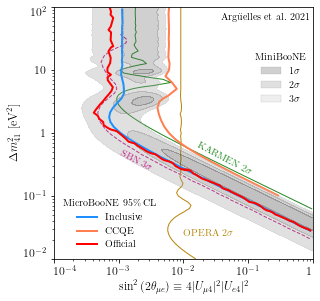

In [180]:
from MicroTools.plot_tools import *
from matplotlib.ticker import FixedLocator

CHI2_CRITICAL = 5.99 #11.83
fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='out')
ax.tick_params(direction='out', which='minor')
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"))
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"))

####################
# plot data

levs = [np.min(ch2V) + CHI2_CRITICAL]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=2)
levs_ccqe   = [np.min(CCQEDatTrim) + CHI2_CRITICAL]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=2)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)
ax.contour(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=1, linewidths=0.25)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+CHI2_CRITICAL], colors='forestgreen', linestyles='-', linewidths=1, zorder=0)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+CHI2_CRITICAL], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', label=r"{Inclusive}")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='coral', label=r"{CCQE}")

colors=['#666666', '#999999', '#CCCCCC']
labels=[r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']

sin2t, dm2 = np.genfromtxt("MicroTools/MicroOscData/sinThetaEMu_fixed.dat", unpack=True)
order = np.argsort(dm2)
plt.plot(sin2t[order], dm2[order], lw=2, color='red', label='Official')


#########
# labels and legens 
proxy = [plt.Rectangle((0,0),1,1,fc =colors[i], ec='black', label=labels[i], alpha=0.3, lw=0.25) for i in range(3)]
leg2 = ax.legend(proxy, labels, fontsize=fsize_annotate, title=r"MiniBooNE", loc=(0.76,0.6))
leg1 = ax.legend(loc='lower left', title=r"MicroBooNE $95\%\,$CL", title_fontsize = fsize_annotate, frameon=False)
plt.gca().add_artist(leg2)


ax.annotate(r"Arg\"{u}elles\ et\ al.\ 2021", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=fsize_annotate, color='k')

keyargs = {'textcoords': "data", 'ha': "left", 'va':"bottom", 'size': fsize_annotate}
# ax.annotate(r"MB $1\sigma$", xy=(1.5e-4, 3), color='#333333')
# ax.annotate(r"$2\sigma$", xy=(1.5e-4, 2), color='#666666')
# ax.annotate(r"$3\sigma$", xy=(1.5e-4, 1.2), color='#999999')

ax.annotate(r"SBN $3\sigma$", xy=(1e-3,0.24), color='mediumvioletred', rotation=-28, **keyargs)
ax.annotate(r"OPERA $2\sigma$", xy=(1e-2, 2.2e-2), color="darkgoldenrod", **keyargs)
ax.annotate(r"KARMEN $2\sigma$", xy=(16e-3,0.2), color="forestgreen", rotation=-28, **keyargs)
flushalign(ax)

# save figure
fig.savefig(f"{path_plots}/Fig3/Fig_3_v2.pdf", bbox_inches='tight')


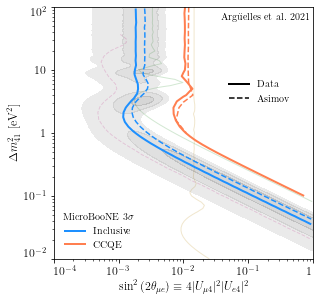

In [178]:
from MicroTools.plot_tools import *
from matplotlib.ticker import FixedLocator

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='out')
ax.tick_params(direction='out', which='minor')
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"))
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"))

##############
# Plot data
levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=2)
levsAs = [np.min(ch2VAs) + 11.83]
ax.contour(ssqthV, dm41V, ch2VAs, levels=levsAs, linestyles=['--'], colors=['dodgerblue'], linewidths=1.5)

levs_ccqe   = [np.min(CCQEDatTrim) + 11.83]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=2)
levsAs_ccqe = [np.min(CCQEAsTrim) + 11.83]
ax.contour(ssqthV_ccqe[1], (dm41V_ccqe[1])[10:], CCQEAsTrim, levels=levsAs_ccqe, linestyles=['--'], colors=['coral'], linewidths=1.5)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.2)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0, alpha=0.2)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+11.83], colors='forestgreen', linestyles='-', linewidths=1, zorder=0, alpha=0.2)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+11.83], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0, alpha=0.2)

#########
# labels and legens 
h = []
h.append(plt.plot([], [], color='k', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='k', ls='--', lw=1.5)[0])
leg2 = plt.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], fontsize=fsize_annotate, framealpha=1.0, loc=(0.66,0.6))
ax.add_artist(leg2)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', label=r"$\mathrm{Inclusive}$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='coral', label=r"$\mathrm{CCQE}$")
leg = ax.legend(loc=3, framealpha=1.0, title=r"$\mathrm{MicroBooNE\ 3\sigma}$", fontsize = fsize_annotate)

ax.annotate(r"Arg\"{u}elles\ et\ al.\ 2021", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=fsize_annotate, color='k')
flushalign(ax)

# save figure
fig.savefig(f"{path_plots}/Fig3/FigSuppl_1_v2.pdf", bbox_inches='tight')

In [16]:
data = np.genfromtxt('MicroTools/MicroOscData/material_gridscan_dm2_t14_t24__dchi2.txt', skip_header=4)


In [36]:
data

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.08000000e-04, 1.08000000e-04, 2.52958516e+00],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        1.08000000e-04, 1.26000000e-04, 2.52958539e+00],
       [1.00000000e+00, 1.00000000e+00, 3.00000000e+00, ...,
        1.08000000e-04, 1.47000000e-04, 2.52958567e+00],
       ...,
       [8.00000000e+01, 6.00000000e+01, 5.80000000e+01, ...,
        9.26119000e-01, 6.81292000e-01, 5.86971771e+03],
       [8.00000000e+01, 6.00000000e+01, 5.90000000e+01, ...,
        9.26119000e-01, 7.94328000e-01, 6.32235942e+03],
       [8.00000000e+01, 6.00000000e+01, 6.00000000e+01, ...,
        9.26119000e-01, 9.26119000e-01, 6.77920550e+03]])

In [91]:
dm2, sin2t14, sin2t24, dchi2 = data[:,3:7].T

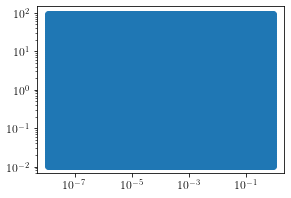

In [90]:
plt.scatter(sin2t24*sin2t14, dm2)
plt.xscale("log")
plt.yscale("log")

In [ ]:
MargM = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
MargE = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(EVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]


In [151]:
marg14 = np.array([[np.min(dchi2[(sin2t14 == st14) & (d == dm2)]) for st14 in sin2t14] for d in dm2])

KeyboardInterrupt: 

In [150]:
# MargDChi2 = [[np.min([dchi2[dm41II][Ue4SqII][Um4SqII] for i,t14 in enumerate(sin2t14)]) for j,t24 in enumerate(sin2t24)] for k,dm in enumerate(dm2)]

marg14 = [[np.min(dchi2[(sin2t14 == st14) & (d == dm2)]) for st14 in sin2t14] for d in dm2]

# mask = (9e-3 < sin2t14) & (sin2t14 < 1e-2)
mask = (sin2t14 == np.min(sin2t14))
plt.tricontour(np.log10(sin2t24*sin2t14)[mask], dm2[mask], dchi2[mask], levels=[7.81])
# plt.xlim(1e-4,1)
# plt.xscale('log')
plt.yscale('log')

KeyboardInterrupt: 

In [144]:
mask = np.argsort(dchi2)


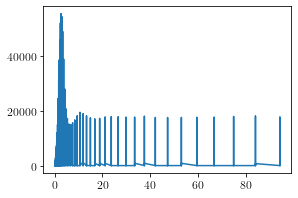

In [134]:
minimum = np.argmin(dchi2)
mask = np.argsort(dchi2)
mask = np.argsort(dm2)

plt.plot(dm2[mask], dchi2[mask])